In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import time
import matplotlib.pyplot as plt
import random

In [34]:
from src.data.make_dataset import make_dataset
from src.data.dataset_loaders import AerialCarsDatasetLoader
from src.data.image_loaders import AerialCarsFixedSizeImageLoader, AerialCarsImageLoader, AerialCarsImageLoaderSquare
from src.features.pipelines import RawImageToImage
from src.features.processors import NormImage, Resize
from src.features.descriptors import HOGDescriptor, LBPDescriptor
from src.models.detectors import SliderDetector
from src.data.sliders import SlidingWindow

In [19]:
DATASET_PATH = './../../../data/raw/aerial-cars-dataset/'
WORKERS = 7

In [20]:
# dataset_loader = AerialCarsDatasetLoader(
#     image_loader=AerialCarsFixedSizeImageLoader(
#         bnd_box_size=BND_BOX_SIZE
#     )
# )

dataset_loader = AerialCarsDatasetLoader(
    image_loader=AerialCarsImageLoaderSquare()
)

images = dataset_loader.load_dataset(
    input_folder_filepath=DATASET_PATH,
    images_files_types=('jpg', 'JPG', 'png'),
    annotations_files_types=('txt',),
    verbose=True
)

100%|██████████| 321/321 [00:08<00:00, 38.44it/s]


In [21]:
len(images)

154

In [22]:
bndb = []
for image in images:
    for b in image.bnd_boxes:
        bndb.append(b)

len(bndb)

3787

In [48]:
resize = Resize(output_size=(64, 64))

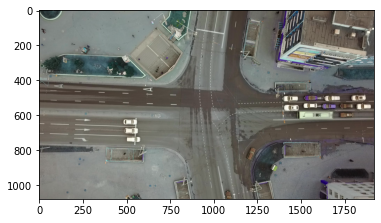

In [32]:
plt.imshow(images[1].image)

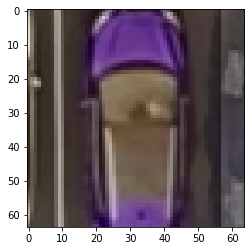

In [33]:
plt.imshow(images[1].get_car(images[1].bnd_boxes[4]))

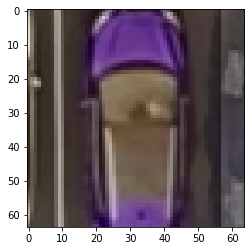

In [47]:
plt.imshow(resize.process(images[1].get_car(images[1].bnd_boxes[4])))

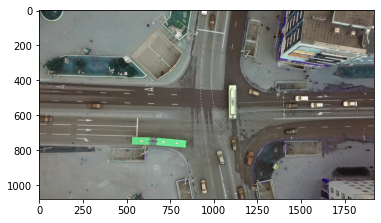

In [23]:
plt.imshow(images[8].image)

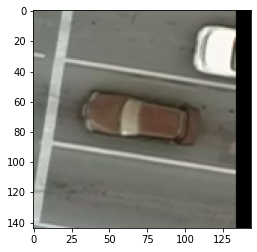

In [24]:
plt.imshow(images[8].get_car(images[8].bnd_boxes[4]))

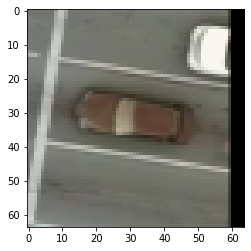

In [46]:
plt.imshow(resize.process(images[8].get_car(images[8].bnd_boxes[4])))

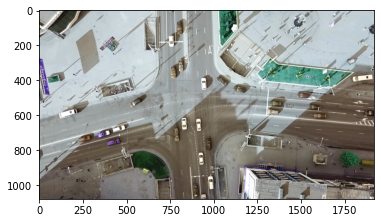

In [25]:
plt.imshow(images[40].image)

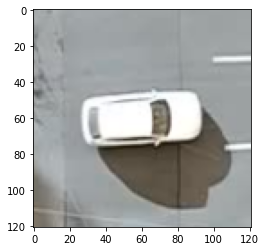

In [26]:
plt.imshow(images[40].get_car(images[40].bnd_boxes[4]))

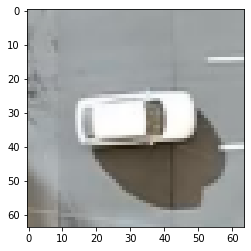

In [45]:
plt.imshow(resize.process(images[40].get_car(images[40].bnd_boxes[4])))

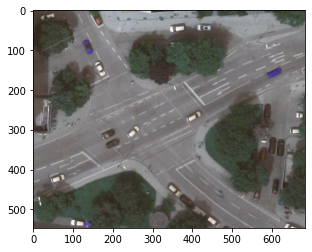

In [27]:
plt.imshow(images[9].image)

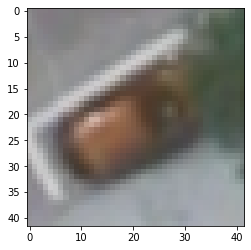

In [28]:
plt.imshow(images[9].get_car(images[9].bnd_boxes[4]))

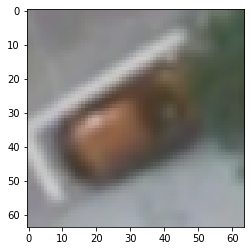

In [44]:
plt.imshow(resize.process(images[9].get_car(images[9].bnd_boxes[4])))